<a href="https://colab.research.google.com/github/riddhikaa/csir_npl_work/blob/main/EXPLORING_PCA_ON_classification_breastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders==2.6.0
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm, model_selection, tree, ensemble, neighbors, preprocessing, base, metrics
import category_encoders
import imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.1 MB/s eta 0:00:00


In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
file_path = '/content/drive/MyDrive/breastcancer_data/Breast_GSE45827.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,206926_s_at,206927_s_at,206928_at,206929_s_at,206930_at,206931_at,206932_at,206933_s_at,206934_at,206935_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095,7.787712,...,6.044257,4.246112,7.356438,7.341858,3.506792,3.768854,5.137365,4.629826,3.757307,3.158962
std,45.431226,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550,1.648260,...,0.221328,0.598269,0.917928,0.634097,0.446523,0.331310,1.129532,0.261335,0.255985,0.975045
min,84.000000,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065,3.866030,...,5.498867,3.551508,4.540807,5.775699,2.832078,3.232748,3.573543,3.985600,3.299856,2.615616
25%,121.500000,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260,6.804510,...,5.901127,3.882240,6.781335,6.943383,3.303582,3.581655,4.436561,4.465826,3.616064,2.785401
50%,159.000000,10.416819,7.531673,6.235074,7.333426,3.187703,7.417113,5.274663,4.662957,7.912255,...,6.049805,4.075815,7.318035,7.345197,3.449398,3.712006,4.894887,4.622208,3.721433,2.883247
75%,200.500000,10.735117,8.053832,6.612291,7.513084,3.280416,7.760806,5.456686,4.941337,8.887997,...,6.187191,4.331323,7.947290,7.809136,3.566298,3.894289,5.674998,4.743377,3.885384,3.029796
max,238.000000,11.675109,9.627008,8.364749,8.374055,3.611630,8.569296,6.360765,5.893006,11.710498,...,7.121218,6.414861,10.030405,8.691753,6.902953,5.007437,10.209507,5.745874,5.534706,10.644928


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Columns: 16384 entries, samples to 206935_at
dtypes: float64(16382), int64(1), object(1)
memory usage: 18.9+ MB


In [ ]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,206926_s_at,206927_s_at,206928_at,206929_s_at,206930_at,206931_at,206932_at,206933_s_at,206934_at,206935_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,6.167506,4.157291,8.463251,8.233774,3.440250,3.249266,4.077760,5.114589,3.649391,3.048597
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,6.016303,3.746938,9.166471,7.922956,2.832078,3.563185,4.457529,4.774928,3.886136,4.945811
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,6.298974,3.818161,8.691060,7.209782,3.371737,3.500604,4.909135,4.619495,3.393670,2.940155
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,5.924285,3.799996,8.519125,7.011523,3.412964,3.716722,4.822208,4.792745,3.619956,2.710000
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,5.984826,4.005609,9.199242,7.460834,3.155281,4.028018,5.705145,4.477804,3.724393,2.829142


In [ ]:
df = df.drop(['samples'], axis=1)
df.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,206926_s_at,206927_s_at,206928_at,206929_s_at,206930_at,206931_at,206932_at,206933_s_at,206934_at,206935_at
0,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,6.167506,4.157291,8.463251,8.233774,3.440250,3.249266,4.077760,5.114589,3.649391,3.048597
1,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,6.016303,3.746938,9.166471,7.922956,2.832078,3.563185,4.457529,4.774928,3.886136,4.945811
2,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,6.298974,3.818161,8.691060,7.209782,3.371737,3.500604,4.909135,4.619495,3.393670,2.940155
3,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,5.924285,3.799996,8.519125,7.011523,3.412964,3.716722,4.822208,4.792745,3.619956,2.710000
4,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,5.984826,4.005609,9.199242,7.460834,3.155281,4.028018,5.705145,4.477804,3.724393,2.829142


In [ ]:
target = "type"
val_counts = df[target].value_counts()
print(val_counts, "\n\n")

type
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: count, dtype: int64 




In [ ]:
x=df.drop(['type'], axis=1)
y=df.type

In [ ]:
y
x

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,206926_s_at,206927_s_at,206928_at,206929_s_at,206930_at,206931_at,206932_at,206933_s_at,206934_at,206935_at
0,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,...,6.167506,4.157291,8.463251,8.233774,3.440250,3.249266,4.077760,5.114589,3.649391,3.048597
1,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,...,6.016303,3.746938,9.166471,7.922956,2.832078,3.563185,4.457529,4.774928,3.886136,4.945811
2,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,...,6.298974,3.818161,8.691060,7.209782,3.371737,3.500604,4.909135,4.619495,3.393670,2.940155
3,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,...,5.924285,3.799996,8.519125,7.011523,3.412964,3.716722,4.822208,4.792745,3.619956,2.710000
4,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,3.368243,...,5.984826,4.005609,9.199242,7.460834,3.155281,4.028018,5.705145,4.477804,3.724393,2.829142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,4.126711,...,6.189443,4.087594,7.579160,7.754377,3.590273,3.259013,4.425644,4.492839,3.641459,3.399657
147,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,3.735215,...,5.923191,4.212866,8.079932,6.976803,3.417476,3.621464,4.455523,4.354838,3.815841,2.734473
148,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,3.718392,...,6.334813,3.880888,6.777857,7.476935,3.659144,4.062315,5.172586,4.886257,3.976070,2.810677
149,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,7.364773,4.148290,...,6.315268,4.184568,7.108267,6.932933,3.543341,3.642847,5.973590,4.824694,3.897174,2.902452


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled


array([[-0.79956253,  0.66184251,  0.31065541, ...,  1.86111633,
        -0.42297667, -0.1135665 ],
       [-0.78105222,  0.82416537,  1.30221516, ...,  0.55707816,
         0.50494233,  1.83867846],
       [-0.38504796,  1.85227675, -0.76001854, ..., -0.03966428,
        -1.42526834, -0.22515377],
       ...,
       [ 1.12558961, -0.64056402,  0.12412781, ...,  0.9844975 ,
         0.85743777, -0.35838791],
       [ 0.17254231, -0.15161854, -0.4048311 , ...,  0.74814399,
         0.54820521, -0.2639503 ],
       [ 1.64687488, -0.35876085, -0.51875725, ..., -0.87440686,
        -1.61709388, -0.38217155]])

In [ ]:
print(df.isna().sum())
print(f"Total null count: {df.isna().sum().sum()}")

type           0
1007_s_at      0
1053_at        0
117_at         0
121_at         0
              ..
206931_at      0
206932_at      0
206933_s_at    0
206934_at      0
206935_at      0
Length: 16383, dtype: int64
Total null count: 0


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(.70)
x_pca=pca.fit_transform(x_scaled)
x_pca

array([[-55.50585149,  47.56736644,  -9.97532438, ...,  11.86589842,
          3.34487692,  -1.64158717],
       [-65.23555139,  25.33479439, -18.22812938, ...,   2.65926272,
          5.57323473,  14.04817047],
       [-38.21804596,  68.50206826,  -6.93226545, ..., -20.12927516,
        -12.21296373,   3.35327427],
       ...,
       [ 29.6071908 ,   1.81941951,  13.99256097, ...,   3.24449601,
          8.21390646,   2.94494785],
       [ 46.84393261, -12.10666078,  10.81685345, ...,   7.81006737,
         -0.22940663, -13.09454543],
       [ 31.31896893, -11.98671195,  17.82167157, ...,   8.13939861,
         20.32720516,  -3.10232619]])

In [ ]:
x_pca.shape

(151, 51)

In [ ]:
pca.explained_variance_ratio_

array([0.13586304, 0.09338298, 0.04885743, 0.03456013, 0.02969294,
       0.02481731, 0.021415  , 0.01780173, 0.01485017, 0.01266716,
       0.01186261, 0.01057544, 0.00982851, 0.0094674 , 0.00904246,
       0.00865741, 0.00850751, 0.00802592, 0.00793949, 0.0078553 ,
       0.00749539, 0.0072938 , 0.00720653, 0.00699283, 0.00675277,
       0.006746  , 0.00658343, 0.00639044, 0.0062262 , 0.00611817,
       0.00599684, 0.00594788, 0.00581129, 0.00575196, 0.00555147,
       0.00551417, 0.00538736, 0.00532267, 0.00526118, 0.00516091,
       0.00514135, 0.00510038, 0.00499361, 0.00497245, 0.00484141,
       0.0048306 , 0.00482291, 0.00474402, 0.0046642 , 0.00463041,
       0.00453913])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.33,random_state=30 ,  stratify=y)

In [ ]:
# y_train

In [ ]:
pca_df = pd.DataFrame(data=x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])
pca_df['Class'] = y_train
pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,Class
0,-55.505851,47.567366,-9.975324,-12.129965,38.805557,-23.344902,-2.682326,-19.010374,9.874426,0.305646,...,3.583492,23.408732,16.179818,19.770547,-10.944976,6.503008,11.865898,3.344877,-1.641587,basal
1,-65.235551,25.334794,-18.228129,-1.032565,37.471092,-20.615895,16.022628,-18.844993,0.193067,4.448061,...,-6.516703,-17.340955,-4.756901,11.047484,-17.107096,-24.109453,2.659263,5.573235,14.048170,basal
2,-38.218046,68.502068,-6.932265,-7.012947,41.594114,-23.065526,28.012369,-26.934739,7.603621,1.632900,...,-0.607493,-12.909660,-16.424440,0.713613,1.803649,-7.937039,-20.129275,-12.212964,3.353274,basal
3,-59.235201,21.526931,-16.321117,-18.782628,34.655364,-14.725596,-28.860413,-16.637277,3.579145,6.969917,...,-0.631870,-10.443609,1.901758,8.893565,12.763070,-1.486163,-5.671355,-26.616848,-0.890249,basal
4,-69.223141,22.769124,-9.804471,-10.254317,32.990079,-19.528670,-13.010537,-12.455798,14.221184,2.411541,...,13.181373,1.875555,13.498681,-7.427579,-0.044050,-3.435537,-1.984708,-0.391646,-1.888735,basal


In [ ]:
pca_df=pca_df.dropna(subset=['Class'])

In [ ]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,Class
0,-55.505851,47.567366,-9.975324,-12.129965,38.805557,-23.344902,-2.682326,-19.010374,9.874426,0.305646,...,3.583492,23.408732,16.179818,19.770547,-10.944976,6.503008,11.865898,3.344877,-1.641587,basal
1,-65.235551,25.334794,-18.228129,-1.032565,37.471092,-20.615895,16.022628,-18.844993,0.193067,4.448061,...,-6.516703,-17.340955,-4.756901,11.047484,-17.107096,-24.109453,2.659263,5.573235,14.048170,basal
2,-38.218046,68.502068,-6.932265,-7.012947,41.594114,-23.065526,28.012369,-26.934739,7.603621,1.632900,...,-0.607493,-12.909660,-16.424440,0.713613,1.803649,-7.937039,-20.129275,-12.212964,3.353274,basal
3,-59.235201,21.526931,-16.321117,-18.782628,34.655364,-14.725596,-28.860413,-16.637277,3.579145,6.969917,...,-0.631870,-10.443609,1.901758,8.893565,12.763070,-1.486163,-5.671355,-26.616848,-0.890249,basal
4,-69.223141,22.769124,-9.804471,-10.254317,32.990079,-19.528670,-13.010537,-12.455798,14.221184,2.411541,...,13.181373,1.875555,13.498681,-7.427579,-0.044050,-3.435537,-1.984708,-0.391646,-1.888735,basal


<Figure size 1000x1000 with 0 Axes>

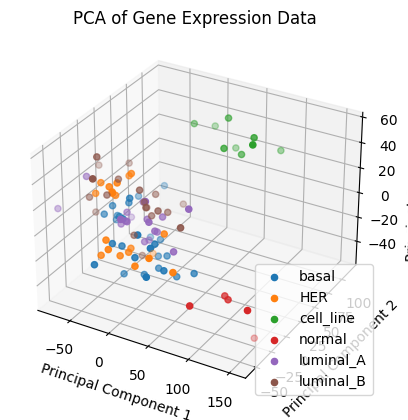

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10, 10))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in pca_df['Class'].unique():
    ax.scatter(pca_df.loc[pca_df['Class'] == label, 'PC1'],
                pca_df.loc[pca_df['Class'] == label, 'PC2'],
                 pca_df.loc[pca_df['Class'] == label, 'PC3'],
                label=label)
plt.title('PCA of Gene Expression Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.legend()
plt.show()

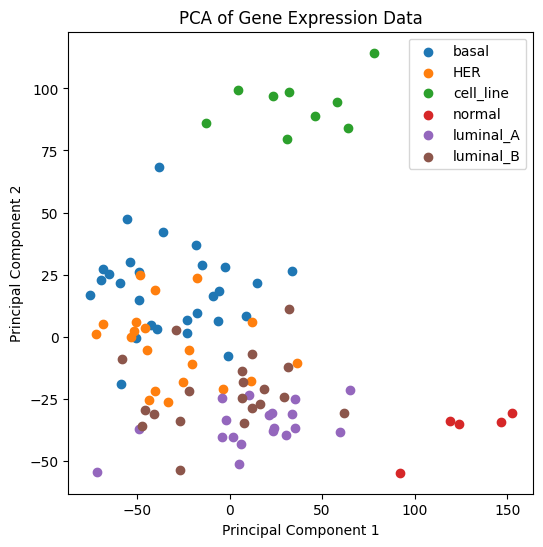

In [ ]:
plt.figure(figsize=(6, 6))

for label in pca_df['Class'].unique():
    plt.scatter(pca_df.loc[pca_df['Class'] == label, 'PC1'],
                pca_df.loc[pca_df['Class'] == label, 'PC2'],

                label=label)
plt.title('PCA of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=30)
svm_model.fit(x_train, y_train)
print("training accuracy: ",svm_model.score(x_train, y_train))
print("Testing accuracy: ",svm_model.score(x_test, y_test))


training accuracy:  0.9801980198019802
Testing accuracy:  0.96


Training Accuracy of SVM model: 0.98
Training F1 score of SVM model: 0.98
Testing Accuracy of SVM model: 0.96
Testing F1 score of SVM model: 0.96


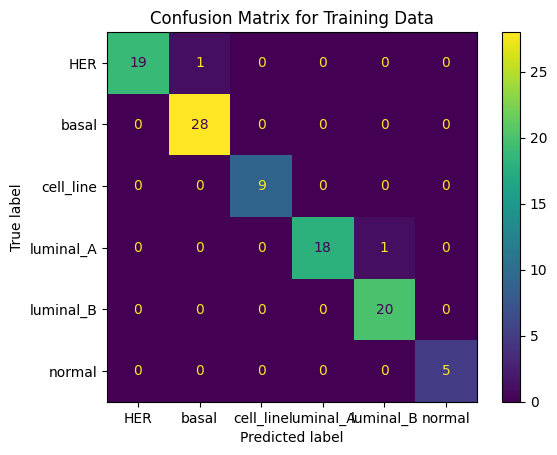

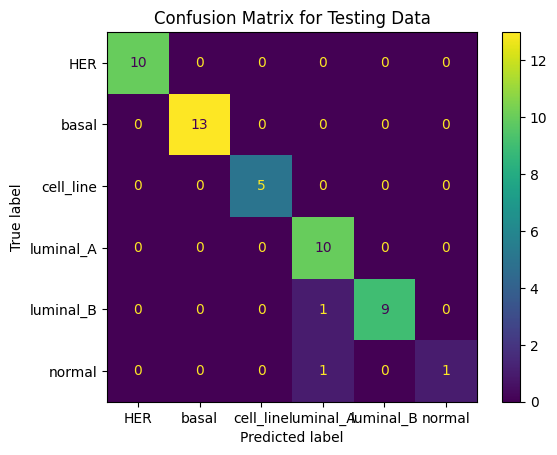

In [ ]:
y_train_pred = svm_model.predict(x_train)
y_test_pred = svm_model.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# Evaluation on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred,average='weighted')
print(f"Training Accuracy of SVM model: {train_accuracy:.2f}")
print(f"Training F1 score of SVM model: {train_f1:.2f}")

# Evaluation on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred,average='weighted')
print(f"Testing Accuracy of SVM model: {test_accuracy:.2f}")
print(f"Testing F1 score of SVM model: {test_f1:.2f}")

# Confusion matrix for training data
train_cm = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(train_cm, display_labels=svm_model.classes_).plot()
plt.title('Confusion Matrix for Training Data')
plt.show()
print('\n')
# Confusion matrix for testing data
test_cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(test_cm, display_labels=svm_model.classes_).plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()


In [ ]:
file_path = '/content/drive/MyDrive/breastcancer_data/original_Breast_GSE70947.xlsx'
df2 = pd.read_excel(file_path)

In [ ]:
df2.head()

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,NM_207327,NM_001004477,NM_020700,NM_005895,NM_000679,NR_003529,NR_036446,NM_001001957,lincRNA:chr7:29652000-29661000_R,ENST00000494108
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,normal,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,10.453202,4.376090,5.597596,11.860087,11.321528,4.486530,5.489959,5.810069,4.834056,4.383929
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,normal,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,10.066372,4.383785,5.404546,11.636828,8.283747,4.770318,5.345571,4.457930,4.441395,4.411587
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,normal,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,10.380676,4.428892,5.356374,12.031338,9.420630,4.394069,5.851030,4.508072,4.568262,4.316081
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,normal,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,10.509871,4.381542,5.757179,11.944607,10.311339,4.451118,6.117379,4.505663,4.413361,4.537626
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,normal,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,10.552841,4.386116,6.851058,11.976510,10.904219,4.432566,6.286439,4.540453,4.412933,4.452250


In [ ]:
df2.describe()

,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,NM_005937,NM_152493,...,NM_207327,NM_001004477,NM_020700,NM_005895,NM_000679,NR_003529,NR_036446,NM_001001957,lincRNA:chr7:29652000-29661000_R,ENST00000494108
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,8.807742,7.627741,6.450728,11.497158,9.322264,4.987633,6.269527,4.944101,11.277334,10.746515,...,10.486877,4.528736,5.993313,11.941958,8.943709,4.595742,6.059155,4.663339,4.559663,4.501161
std,0.394643,0.575386,0.484014,0.512475,0.642028,0.460599,0.416950,0.466580,0.608760,0.408710,...,0.354630,0.253179,0.918072,0.338898,1.434737,0.301194,0.467498,0.428505,0.188700,0.160541
min,7.485650,4.697723,4.999570,9.890948,7.300571,4.373669,4.918267,4.411437,8.902835,8.969995,...,9.147846,4.306410,4.417191,10.674843,4.229948,4.298571,4.546270,4.316387,4.296080,4.293911
25%,8.553073,7.301644,6.165165,11.136781,8.904733,4.654774,5.998702,4.634772,10.917057,10.499735,...,10.268938,4.408803,5.356374,11.751196,7.990614,4.430943,5.807835,4.432176,4.446585,4.390475
50%,8.794195,7.592968,6.375210,11.454471,9.252311,4.854474,6.235356,4.802099,11.266808,10.754292,...,10.512115,4.477944,5.837927,11.964778,9.220345,4.520683,6.046457,4.527872,4.511086,4.449029
75%,9.066981,7.929071,6.707809,11.765610,9.658443,5.197298,6.559518,5.093409,11.571750,10.990809,...,10.688153,4.554197,6.476852,12.162452,9.995126,4.621924,6.348592,4.723871,4.608916,4.574283
max,10.071327,9.747967,8.540421,13.500689,11.873437,7.383097,7.639028,7.792233,13.213366,12.216708,...,11.537900,7.536663,9.066981,13.428356,11.646788,6.665221,8.525777,8.182246,5.789876,5.303729


In [ ]:
df2 = df2.drop(['samples'], axis=1)

target2 = "type"
val_counts = df2[target2].value_counts()
print(val_counts, "\n\n")

type
normal                   146
breast_adenocarcinoma    143
Name: count, dtype: int64 




In [ ]:
X=df2.drop(['type'], axis=1)
Y=df2.type

In [ ]:
# X

# Y
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled


array([[-0.29044738,  0.15716683, -0.8408758 , ...,  2.68075938,
         1.45665056, -0.73149791],
       [ 1.44237276, -0.96712986,  1.08865853, ..., -0.4801926 ,
        -0.62783994, -0.55891825],
       [ 0.34444946,  0.58641694, -0.37599821, ..., -0.36297329,
         0.04565033, -1.15485043],
       ...,
       [ 0.61844411,  0.04204796, -1.2523575 , ..., -0.58206946,
        -0.16379634, -0.66603261],
       [-1.75940706,  0.81641611, -0.19732212, ...,  3.49075372,
        -0.94808245, -0.33762363],
       [ 0.05034099, -0.15467297, -0.17834283, ..., -0.06786938,
        -0.57816854, -0.73674315]])

In [ ]:
pca2=PCA(3) # 70%
X_pca=pca2.fit_transform(X_scaled)
X_pca

array([[-3.82428754e+01, -3.04852146e+01,  4.76228673e-01],
       [-7.65544942e+00,  2.27954634e+01, -3.87039613e+01],
       [-5.92818651e+01,  2.54745830e+01, -2.33491657e+00],
       [-5.42070560e+01, -1.89656781e+01,  2.60020900e+01],
       [-9.18688647e+00, -2.96492363e+01,  4.09648182e+01],
       [-3.04896448e+01, -2.08343710e+01,  1.30365784e+01],
       [-3.74278703e+01,  2.76224353e+00, -6.95420596e+00],
       [-5.30856868e+01, -3.00824674e+01, -1.97287439e+01],
       [-6.53883175e+01, -6.60907567e+00, -2.79293582e+01],
       [-3.96942741e+01, -1.16029628e+01,  1.53072337e+01],
       [-5.30093503e+01, -6.68554697e+00, -4.35734839e+01],
       [-3.06371524e+00, -4.10866840e+01,  1.06323192e+01],
       [-2.77568347e+01, -2.30894138e+01, -2.81967733e+01],
       [-7.40636211e+01, -2.03582829e+00, -5.43539589e+01],
       [-5.65848025e+01,  1.39882984e+01, -4.08575075e+01],
       [-4.93874834e+01, -1.59884711e+01,  8.04715732e+00],
       [-6.78983212e+01,  4.01772866e+01

In [ ]:
X_pca.shape

(289, 3)

In [ ]:
pca2.explained_variance_ratio_

array([0.14794155, 0.06197764, 0.0470773 ])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_pca,Y,test_size=0.33,random_state=42 , stratify=Y)

pca2_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca2_df['Class'] = Y_train
pca2_df.head()



,PC1,PC2,PC3,Class
0,-38.242875,-30.485215,0.476229,NaN
1,-7.655449,22.795463,-38.703961,normal
2,-59.281865,25.474583,-2.334917,NaN
3,-54.207056,-18.965678,26.002090,normal
4,-9.186886,-29.649236,40.964818,normal


In [ ]:
pca2_df=pca2_df.dropna(subset=['Class']) # DROPING NULL VALUES IN CLASS

<Figure size 600x600 with 0 Axes>

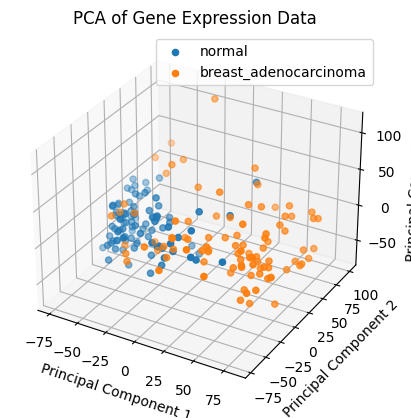

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(6, 6))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in pca2_df['Class'].unique():
    ax.scatter(pca2_df.loc[pca2_df['Class'] == label, 'PC1'],
                pca2_df.loc[pca2_df['Class'] == label, 'PC2'],
                 pca2_df.loc[pca2_df['Class'] == label, 'PC3'],
                label=label)
plt.title('PCA of Gene Expression Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.legend()
plt.show()

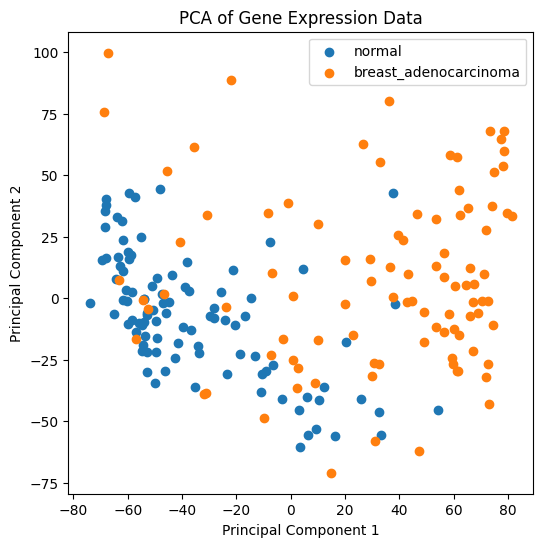

In [ ]:
plt.figure(figsize=(6, 6))

for label in pca2_df['Class'].unique():
    plt.scatter(pca2_df.loc[pca2_df['Class'] == label, 'PC1'],
                pca2_df.loc[pca2_df['Class'] == label, 'PC2'],

                label=label)
plt.title('PCA of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.legend()
plt.show()

In [ ]:
svm2_model = SVC(random_state=42)
svm2_model.fit(X_train, Y_train)
print("training accuracy: ",svm2_model.score(X_train, Y_train))
print("Testing accuracy: ",svm2_model.score(X_test, Y_test))

training accuracy:  0.8712871287128713
Testing accuracy:  0.8045977011494253


Training Accuracy of SVM model: 0.87
Training F1 score of SVM model: 0.86
Testing Accuracy of SVM model: 0.80
Testing F1 score of SVM model: 0.80


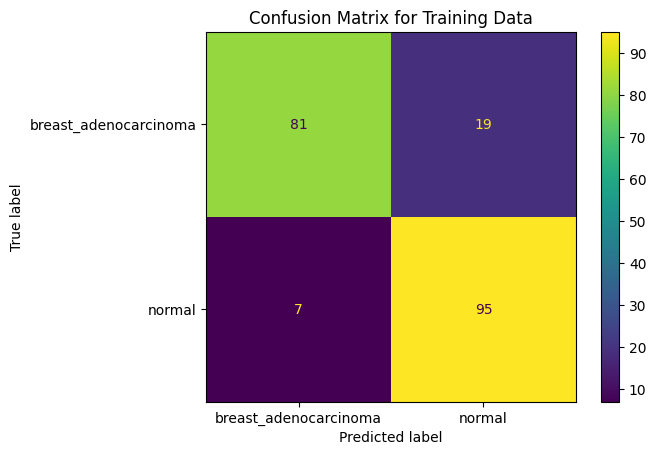

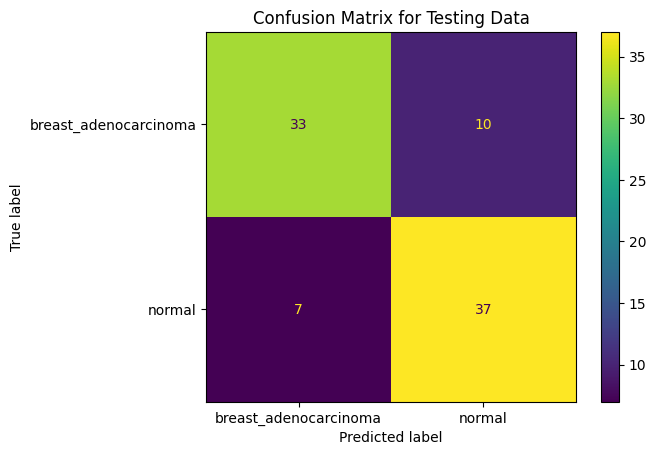

In [ ]:
Y_train_pred = svm2_model.predict(X_train)
Y_test_pred = svm2_model.predict(X_test)

# Evaluation on training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_f1 = f1_score(Y_train, Y_train_pred, pos_label='breast_adenocarcinoma')
print(f"Training Accuracy of SVM model: {train_accuracy:.2f}")
print(f"Training F1 score of SVM model: {train_f1:.2f}")

# Evaluation on testing data
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_f1 = f1_score(Y_test, Y_test_pred , pos_label='breast_adenocarcinoma')
print(f"Testing Accuracy of SVM model: {test_accuracy:.2f}")
print(f"Testing F1 score of SVM model: {test_f1:.2f}")

# Confusion matrix for training data
train_cm = confusion_matrix(Y_train, Y_train_pred)
ConfusionMatrixDisplay(train_cm, display_labels=svm2_model.classes_).plot()
plt.title('Confusion Matrix for Training Data')
plt.show()
print('\n')
# Confusion matrix for testing data
test_cm = confusion_matrix(Y_test, Y_test_pred)
ConfusionMatrixDisplay(test_cm, display_labels=svm2_model.classes_).plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()
